In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#https://towardsdatascience.com/time-series-from-scratch-introduction-to-time-series-with-pandas-347ac9c6b451

df = pd.read_csv('data/LTOTALNSA.csv', index_col='DATE', parse_dates=True)
df.head()

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1
1976-04-01,1163.2
1976-05-01,1176.1


### Resampling
Simply put, resampling allows you to change the aggregation level of a time series. If you have data collected in hourly intervals but need daily totals for the analysis, resampling is the way to go.
The following code snippet resamples our monthly dataset to yearly totals:

In [3]:
yearly_totals = df.resample(rule='Y').sum()
yearly_totals.head()

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9
1978-12-31,14981.0
1979-12-31,13758.4
1980-12-31,11197.5


You are free to use any aggregation function that Pandas provides. For example, you could also aggregate to show quarterly averages:

In [4]:
quarterly_means = df.resample(rule='Q').mean()
quarterly_means.head()

,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667


#### And that’s resampling in a nutshell. Just keep in mind — it’s easy to go from monthly to yearly data, but it’s impossible to do the opposite.


#### Shifting
The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.
The following code snippet shifts down the entire series by one and two periods. The shifted versions are stored as additional columns:

In [5]:
df_shift = df.copy()
df_shift['Shift_1'] = df_shift['LTOTALNSA'].shift(1)
df_shift['Shift_2'] = df_shift['LTOTALNSA'].shift(2)
df_shift.head()

,LTOTALNSA,Shift_1,Shift_2
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,864.6,NaN
1976-03-01,1216.1,973.3,864.6
1976-04-01,1163.2,1216.1,973.3
1976-05-01,1176.1,1163.2,1216.1


The same can be done at the other end of the dataset. There’s no unshift function, so you’ll have to shift the series by a negative value:

In [6]:
df_shift = df.copy()
df_shift['Shift_Neg1'] = df_shift['LTOTALNSA'].shift(-1)
df_shift['Shift_Neg2'] = df_shift['LTOTALNSA'].shift(-2)
df_shift.tail()

,LTOTALNSA,Shift_Neg1,Shift_Neg2
DATE,,,
2021-04-01,1518.413,1570.313,1302.213
2021-05-01,1570.313,1302.213,1276.684
2021-06-01,1302.213,1276.684,1090.446
2021-07-01,1276.684,1090.446,NaN
2021-08-01,1090.446,NaN,NaN


#### Rolling
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data. You can actually make forecasts with moving averages, but more on that some other time.
Here’s how to calculate quarterly and yearly moving averages from the original series:

In [7]:
df_rolling = df.copy()
df_rolling['QuarterRolling'] = df_rolling['LTOTALNSA'].rolling(window=3).mean()
df_rolling['YearRolling'] = df_rolling['LTOTALNSA'].rolling(window=12).mean()
df_rolling.head(15)

,LTOTALNSA,QuarterRolling,YearRolling
DATE,,,
1976-01-01,864.6,NaN,NaN
1976-02-01,973.3,NaN,NaN
1976-03-01,1216.1,1018.000000,NaN
1976-04-01,1163.2,1117.533333,NaN
1976-05-01,1176.1,1185.133333,NaN
1976-06-01,1224.9,1188.066667,NaN
1976-07-01,1130.1,1177.033333,NaN
1976-08-01,994.9,1116.633333,NaN
1976-09-01,1024.9,1049.966667,NaN


#### Media movel nada mais é do que vc utilizar uma janela deslizante de tamanho window, gerar a media, e criar uma outra serie

As you can see, the rolling operation will cost you some data, depending on the window size. But you can see how the values are much more similar after calculating moving averages.


### Differencing
And finally, let’s explore the concept of differencing. It is an essential technique when working with financial data (e.g., stock prices), and you want to calculate returns.
Generally, differencing is used to make the series stationary. This term will be covered in further articles but is essential for building predictive models.
Here’s how to calculate first and second order differences with explanations in the comments:

In [10]:
df_diff = df.copy()
df_diff['Diff_1'] = df_diff['LTOTALNSA'].diff(periods=1)
df_diff['Diff_2'] = df_diff['LTOTALNSA'].diff(periods=2)
df_diff['Diff_3'] = df_diff['LTOTALNSA'].diff(periods=3)
df_diff.head()

# First order:   973.3 - 864.6 = 108.7
# Second order: 1216.1 - 864.6 = 351.5
# Third order:  1163.2 - 864.6 = 298.5

,LTOTALNSA,Diff_1,Diff_2,Diff_3
DATE,,,,
1976-01-01,864.6,NaN,NaN,NaN
1976-02-01,973.3,108.7,NaN,NaN
1976-03-01,1216.1,242.8,351.5,NaN
1976-04-01,1163.2,-52.9,189.9,298.6
1976-05-01,1176.1,12.9,-40.0,202.8


If you were to plot these new columns, it’s likely they would look stationary — meaning they have constant mean, variance, and covariance, but we’ll leave that for another time.


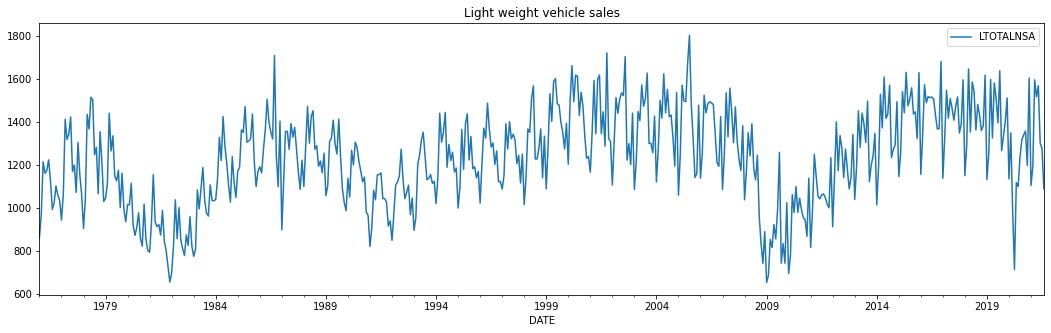

In [11]:
df.plot(figsize=(18, 5), title='Light weight vehicle sales');

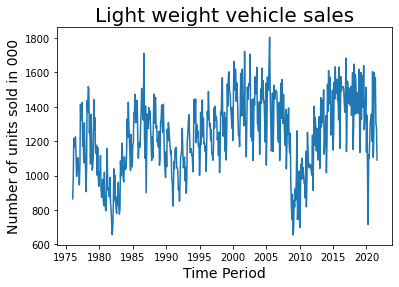

In [16]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in 000', size=14)

plt.plot(df['LTOTALNSA']);

Awesome! But what if you want to visualize only a specific subset? Well, since you’re dealing with the datetime index, you can use Python’s slicing notation. The following code snippet will visualize only the data from 1990 to 2005:


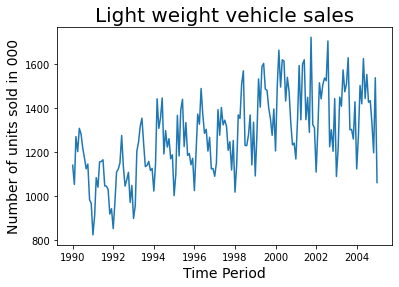

In [17]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in 000', size=14)

plt.plot(df['LTOTALNSA']['1990-01-01':'2005-01-01']);

If you don’t want to use the slicing notation, there’s an alternative. You can use Matplilib’s xlim() and ylim() functions to set ranges of X and Y axes:


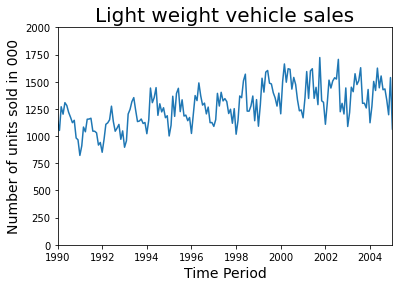

In [20]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in 000', size=14)
plt.xlim(np.array(['1990-01-01', '2005-01-01'], dtype='datetime64'))
plt.ylim([0, 2000])

plt.plot(df['LTOTALNSA']);

In [22]:
#https://towardsdatascience.com/time-series-from-scratch-white-noise-and-random-walk-5c96270514d3

### White Noise: Theory and Implementation
The concept of white noise is essential for time series analysis and forecasting. In the most simple words, white noise tells you if you should further optimize the model or not.
Let me explain.

White noise is a series that’s not predictable, as it’s a sequence of random numbers. If you build a model and its residuals (the difference between predicted and actual) values look like white noise, then you know you did everything to make the model as good as possible. On the opposite side, there’s a better model for your dataset if there are visible patterns in the residuals.

The following conditions must be satisfied for a time series to be classified as white noise:

- The average value (mean) is zero

- Standard deviation is constant — it doesn’t change over time

- The correlation between time series and its lagged version is not significant

The last point might be difficult to understand since we haven’t explored autocorrelation yet, but the concept is simple. You want to determine if a significant correlation exists between the current time series and the same time series shifted by N periods.



There are three (easy) ways to test if time series resembles white noise:
    
- By plotting the time series

- By comparing mean and standard deviation over time

- By examining autocorrelation plots

### Method 1 — Plotting the time series
This is by far the easiest method. The goal is to plot the entire series and visually confirm that the average value is zero, that standard deviation is constant over time, and that no distinct patterns are visible.
Let’s start by importing the libraries. We’ll need the usual suspects, and a couple of Matplotlib styling tweaks:

In [23]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

The plot_acf import will be used later to plot the autocorrelation function, so don’t worry about it for now.
Next, we can create a white noise series by taking a sample of N values from a standard normal distribution. Here’s how you can both declare and plot the series:

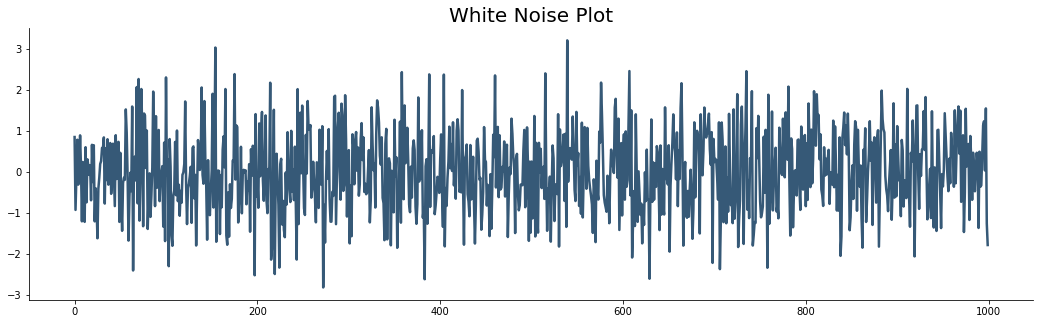

In [24]:
# Declare
white_noise = np.random.randn(1000)

# Plot
plt.title('White Noise Plot', size=20)
plt.plot(np.arange(len(white_noise)), white_noise);

#### After a visual inspection, we can conclude that the mean and standard deviation don’t change over time. There are some occasional spikes, but nothing serious. Also, there are no visible patterns in the series.


### Method 2 — Comparing mean and standard deviation over time
If we assume that mean and standard deviations don’t change over time, then both values should be roughly identical for any two subsets.
The aim here is to split the white noise series into an arbitrary number of chunks (let’s say 20, each having 50 items) and compute the mean and standard deviation for each. You can visualize the results for easier interpretation.
Here’s the Python code for doing so:

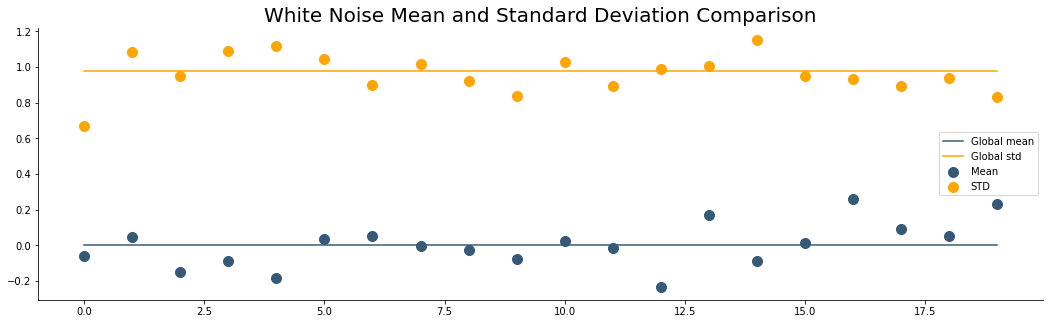

In [25]:
# Split into an arbitraty number of chunks
white_noise_chunks = np.split(white_noise, 20)
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
    
# Plot
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [white_noise.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [white_noise.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

#### There are slight variations, sure, but no subsets show a significant difference from the average.


### Method 3 — Examining autocorrelation plots
You’ll learn everything there is to autocorrelation and autocorrelation plots later in the series, so we won’t dive into too much detail here. All you need to know is that an autocorrelation plot shows the correlation between a time series with itself, lagged by a specific number of periods.
Autocorrelation plots also include a shaded area that represents confidence intervals. Anything inside the shaded area means that the correlation at that point isn’t statistically significant. Autocorrelation at lag 0 will have a value of 1, since the correlation is calculated between two identical time series.
You can use plot_acf() function from statsmodels to obtain this plot:

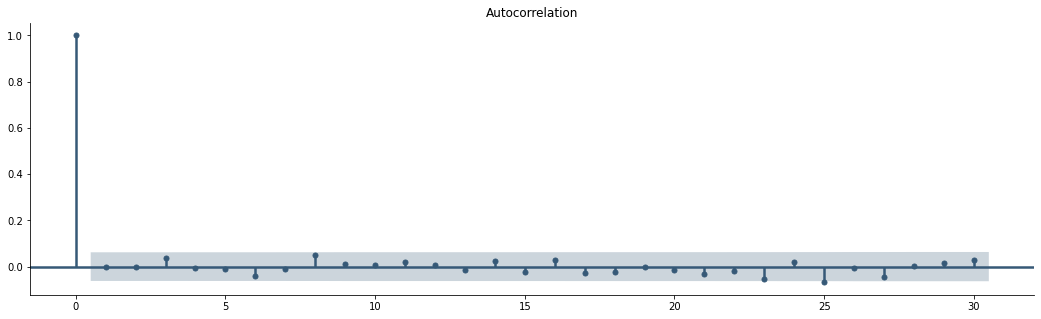

In [26]:
plot_acf(np.array(white_noise));


As you can see, all lags are within the shaded area — except lag 22, which is only marginally outside.
And that concludes the white noise part of the article. You’ve learned the theory behind and how to test for white noise. Let’s continue with random walks.

### Random Walk: Theory and Implementation
Just like white noise, random walk series also isn’t predictable. What makes it different from white noise is the fact that the values aren’t a list of random numbers. The current value depends on the previous one.

To create a dummy random walk series you’ll have to:

- Start at an arbitrary value — let’s say zero
- The next value is the previous value plus added random variation

You can repeat the process of adding additional values as many times as you want. Let’s see this in action — we’ll start with zero, and add 999 other elements (either -1 or 1, depending on the random value):

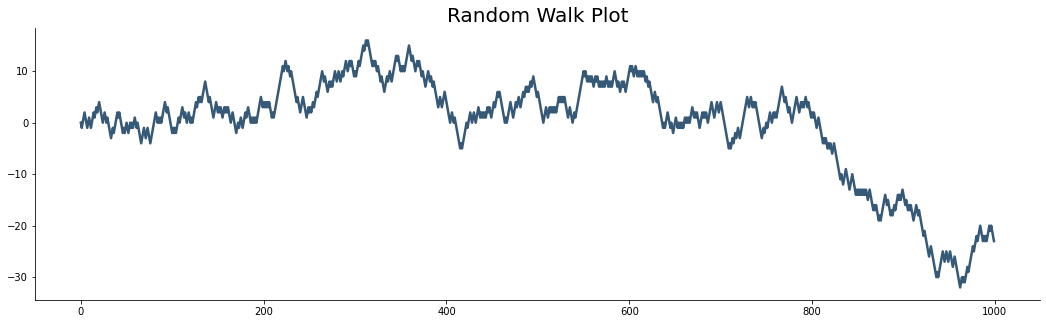

In [27]:
# Start with a random number - let's say 0
random_walk = [0]

for i in range(1, 1000):
    # Movement direction based on a random number
    num = -1 if np.random.random() < 0.5 else 1
    random_walk.append(random_walk[-1] + num)
    
    
# Plot
plt.title('Random Walk Plot', size=20)
plt.plot(np.arange(len(random_walk)), random_walk);

It looks a lot like a stock price, doesn’t it? Let that idea sink in.

Since a correlation exists between current and previous observations, the autocorrelation plot will look different than with white noise:

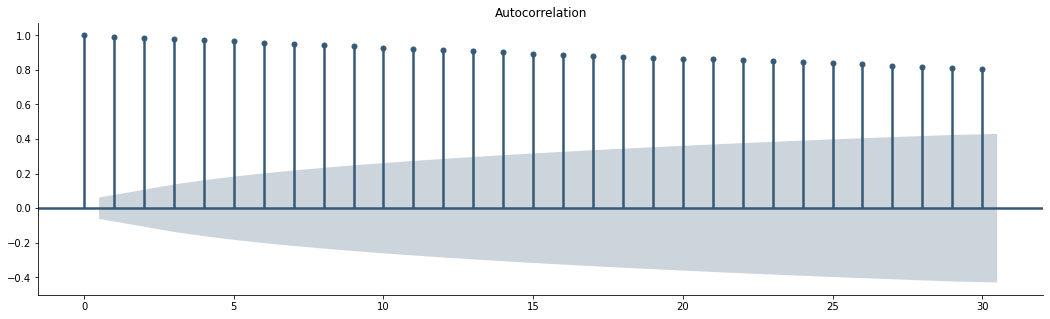

In [28]:
plot_acf(np.array(random_walk));


As you can see, all of the first 30 lags are significant. So it means random walk can be modeled and forecasted? No. 

#### Most forecasting algorithms require stationary data (constant mean, variance, and covariance), and random walk isn’t stationary.

We won’t dive into stationarity tests and the logic behind this concept today. As a rule of thumb, you can make a time series stationary by calculating the first-order difference:

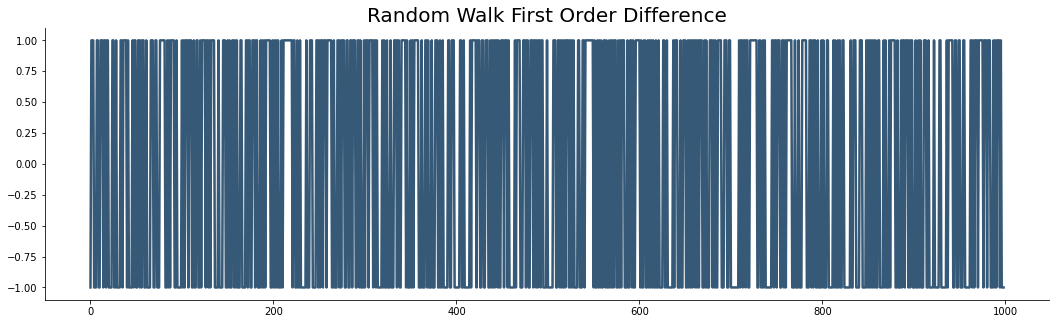

In [30]:
# First-order difference
s_random_walk = pd.Series(random_walk)
s_random_walk_diff = s_random_walk.diff().dropna()

# Plot
plt.title('Random Walk First Order Difference', size=20)
plt.plot(np.arange(len(s_random_walk_diff)), s_random_walk_diff);

The values range from -1 to 1 since these were the incremental movement values in the randomization process. If the movement values were random, the differenced random walk would look like white noise.
To confirm this claim, let’s plot the autocorrelation chart of differenced random walk values. If they resemble the one from white noise, our claim is verified:

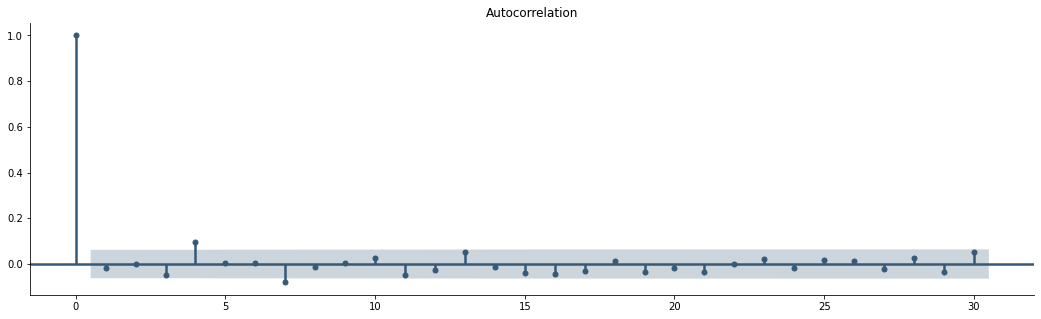

In [31]:
plot_acf(s_random_walk_diff);


#### And there you have it — no learnable patterns are found in a random walk once the series is stationary. In short, don’t even bother with forecasting.


Familiarizing yourself with the concept of white noise and random walk is essential to any time series task. If the data looks like white noise or random walk, don’t bother with forecasting, as it won’t get you anywhere. However, if you absolutely need forecasts, set the forecasted N periods equal to the last value of the series. It won’t look attractive but will minimize the error.

On the other hand, if the model residuals resemble white noise, you did a good thing. It’s unlikely you’ll be able to improve the model further. If there’s a pattern in the residuals, or mean/standard deviation isn’t constant, your work isn’t finished yet. That’s all you should know.

In [33]:
#https://towardsdatascience.com/time-series-from-scratch-decomposing-time-series-data-7b7ad0c30fe7

What is time series decomposition?

Simply put, time series decomposition is a process of deconstructing a time series into the following components:

- Trend — general movement over time
- Seasonal — behaviors captured in individual seasonal periods
- Residual — everything not captured by trend and seasonal components

This technique is most often used for analyzing historical time series data. It’s also sometimes used for forecasting. Modeling trend and seasonality at once might be a too difficult task, so tackling components individually might be a better approach.

Additive vs. multiplicative time series components

There are two techniques for combining time series components:
    
- Additive

- Multiplicative

We care about these because time series decomposition requires you to specify a model type for the seasonal component. The default is additive, but you can easily change that.

The term additive means individual components (trend, seasonality, and residual) are added together:
#### yt = Tt + St + Rt

An additive trend indicates a linear trend, and an additive seasonality indicates the same frequency (width) and amplitude (height) of seasonal cycles.


The term multiplicative means individual components (trend, seasonality, and residuals) are multiplied together:

#### yt = Tt * St * Rt

A multiplicative trend indicates a non-linear trend (curved trend line), and a multiplicative seasonality indicates increasing/decreasing frequency (width) and/or amplitude (height) of seasonal cycles.
Both trend and seasonality can be additive or multiplicative, which means there are four ways these can be combined:

- Additive trend and additive seasonality
- Additive trend and multiplicative seasonality
- Multiplicative trend and additive seasonality
- Multiplicative trend and multiplicative seasonality


### Additive trend and additive seasonality

Additive trend means the trend is linear (straight line), and additive seasonality means there aren’t any changes to widths or heights of seasonal periods over time.

The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates additive trend and seasonality:

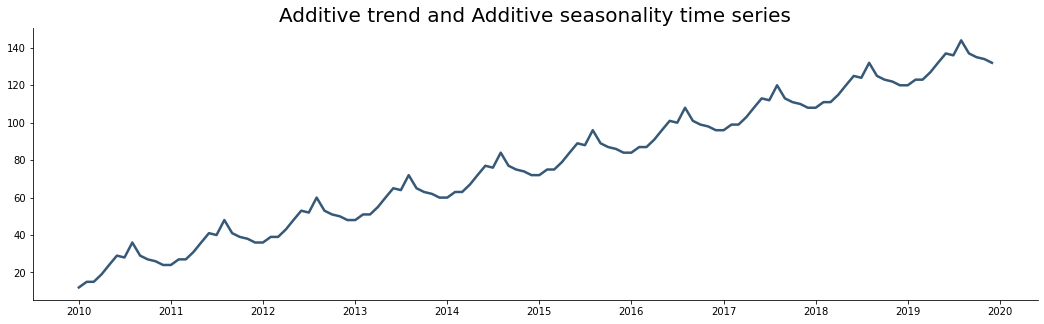

In [34]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# Immitate 10 years of data
x_range = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Additive seasonality time series', size=20)
plt.plot(df_aa);

As you can see, the time series shows a linear trend and seasonality that doesn’t change over time. It’s not the most typical-looking time series, as most likely the amplitude of a seasonal period will change with an increasing trend.


### Additive trend and multiplicative seasonality

Additive trend means the trend is linear (straight line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time.

The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates additive trend and multiplicative seasonality

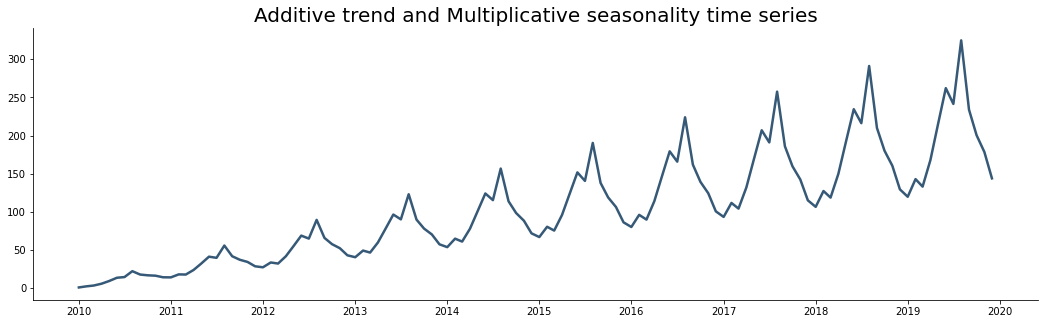

In [35]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]
# Immitate 10 years of data
xs = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_am = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Multiplicative seasonality time series', size=20)
plt.plot(df_am);

Once again, the trend is linear, but the heights of seasonal periods have increased over time. This behavior is typical to many time series for obvious reasons — more volume (an overall increase on the y-axis) introduces more volatility in a single season.


### Multiplicative trend and additive seasonality

Multiplicative trend means the trend is not linear (curved line), and additive seasonality means there aren’t any changes to widths or heights of seasonal periods over time.

The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates multiplicative trend and additive seasonality:

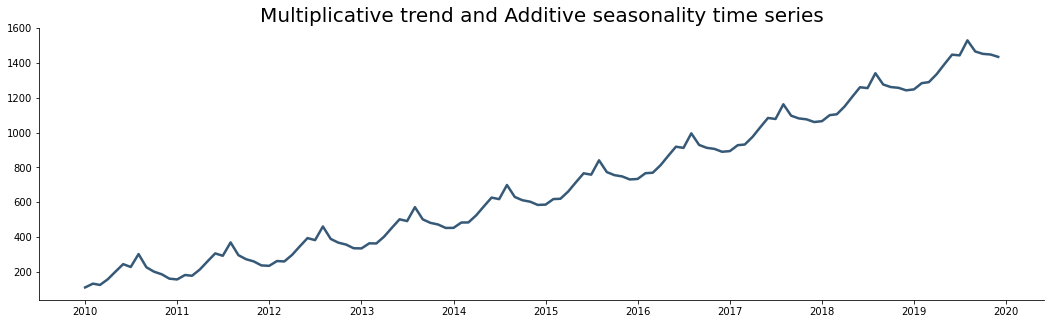

In [36]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.5 power to get upwards "curved" trend
x_range = np.array([x**1.5 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_ma = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Additive seasonality time series', size=20)
plt.plot(df_ma);

You can see how the trend is slightly curved. I haven’t seen too many time series shaped like this because seasonal periods tend to differ in amplitude as the y-axis value increases. But, it’s still a possible scenario.


### Multiplicative trend and multiplicative seasonality

Multiplicative trend means the trend is not linear (curved line), and multiplicative seasonality means there are changes to widths or heights of seasonal periods over time.

The following code snippet creates a dummy 10-year-long monthly-sampled time series that simulates multiplicative trend and multiplicative seasonality:

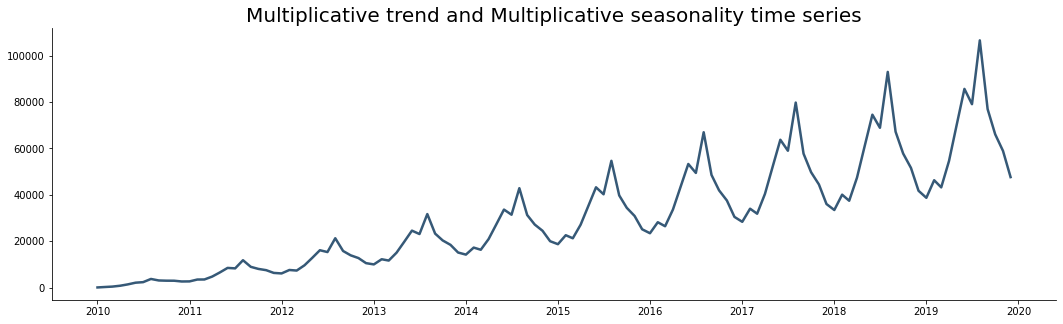

In [37]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);

This is another widespread type of pattern in time series data. You’ll see it often in sales data, for example, when demand for a specific product/service increases over time, but most of the sales are made in summer months (think airplane tickets).


### Decomposition in action


The seasonal_decompose() function from statsmodels excepts at least two parameters:
    
- x: array — your time series.
- model: str — type of seasonal component, can be either additive or multiplicative. The default value is additive.

Having that in mind, let’s decompose our df_aa — a time series with both: additive trend and seasonality:

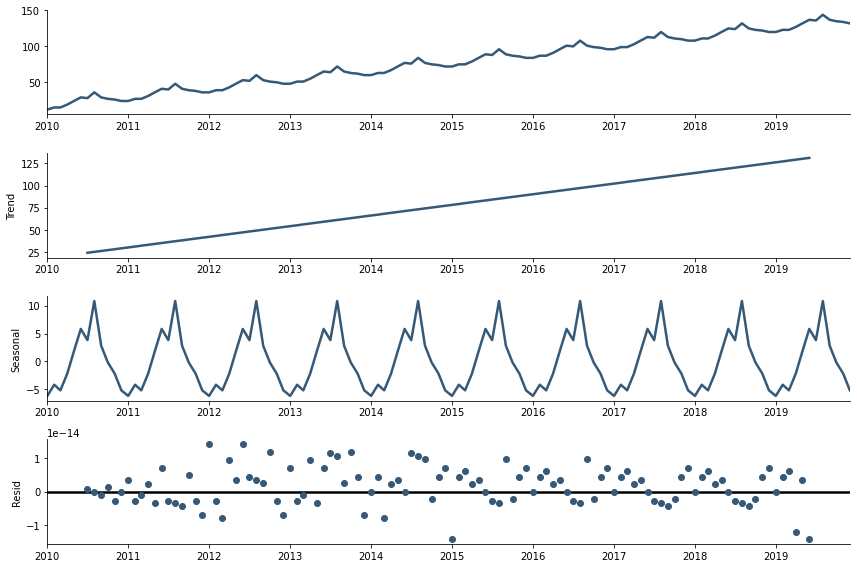

In [41]:
import statsmodels.api as sm

# Change the default figsize
rcParams['figure.figsize'] = 12, 8

# Decompose and plot
decomposed = sm.tsa.seasonal_decompose(df_aa, model='additive')
decomposed.plot();

Both trend and seasonal components were captured decently, to say at least. As the data is synthetic, we know the trend is always going up, and the seasonal component looks like it should. The residuals should be centered around zero and normally distributed. Further, no distinct pattern should be visible in the residuals. That claim holds though most of the time series.


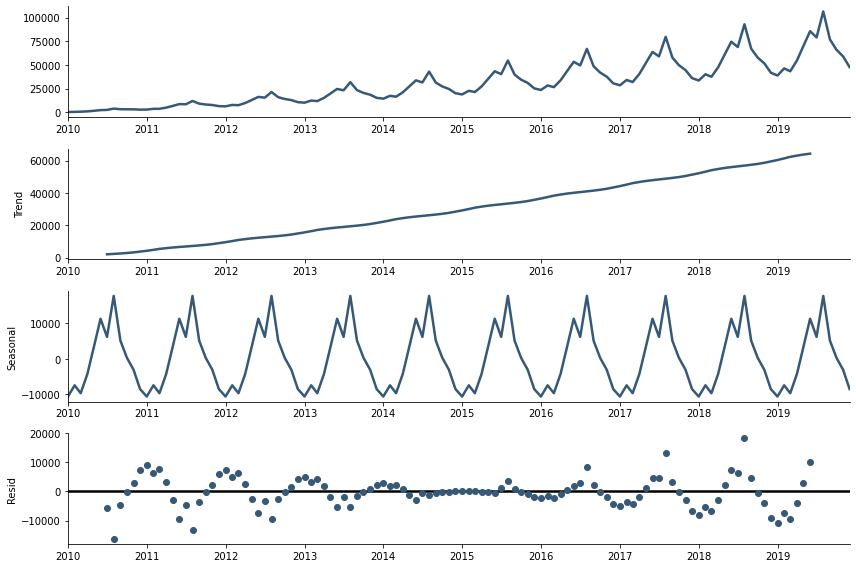

In [42]:
# Change the default figsize
rcParams['figure.figsize'] = 12, 8

# Decompose and plot
decomposed = sm.tsa.seasonal_decompose(df_mm, model='additive')
decomposed.plot();

Just look at these residuals. They are centered around -200 and have a huge standard deviation, and also show a distinct pattern that an additive model didn’t capture.


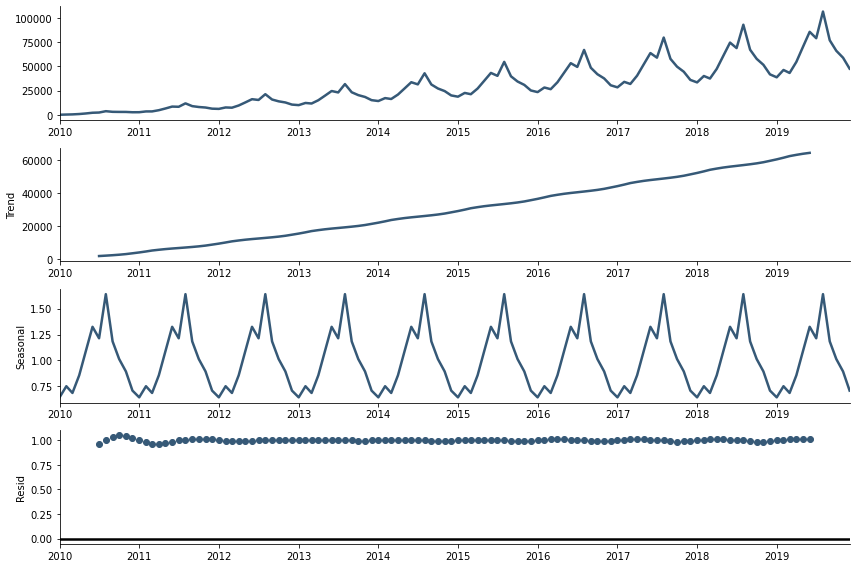

In [43]:
# Change the default figsize
rcParams['figure.figsize'] = 12, 8

# Decompose and plot
decomposed = sm.tsa.seasonal_decompose(df_mm, model='multiplicative')
decomposed.plot();

The residuals are now centered around 1 and have a much lower range and standard deviation.


And there you have it — time series decomposition in a nutshell. It’s a great tool to know when analyzing historical data or modeling individual time series components. Just make sure to know the pattern your time series follows before applying the decomposition algorithm.
I’ve used decomposition many times to determine the number of periods in a seasonal cycle automatically. You can do the same by calculating the number of unique elements of the seasonal decomposed component. Then, if the range of the seasonal component is significant, you know you should use models that capture seasonality.

In [44]:
#https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f

From correlation to autocorrelation

Both terms are tightly connected. Correlation measures the strength of the linear relationship between two sequences:

- The closer the correlation to +1, the stronger the positive linear relationship
- The closer the correlation to -1, the stronger the negative linear relationship
- The closer the correlation to 0, the weaker the linear relationship.

Autocorrelation is the same, but with a twist — you’ll calculate a correlation between a sequence with itself lagged by some number of time units. Don’t worry if you don’t fully get it, as we’ll explore it next.

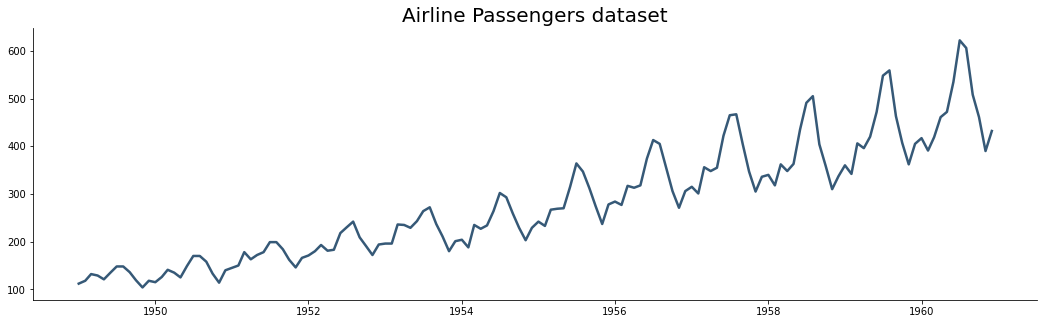

In [46]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Dataset
df = pd.read_csv('data/airline-passengers.csv', index_col='Month', parse_dates=True)

# Visualize
plt.title('Airline Passengers dataset', size=20)
plt.plot(df);

### Autocorrelation — Theory and implementation

As said before, autocorrelation shows the correlation of a sequence with itself lagged by some number of time units. Once plotted, X-axis shows the lag number, and Y-axis shows the correlation of the sequence with a sequence at that lag. Y-axis ranges from -1 to 1.

Here’s an example.

The airline passenger dataset shows the number of passengers per month from 1949 to 1960. Autocorrelation answers the following question: “How correlated is the number of passengers this month with the number of passengers in the previous month?”. Here, the previous month indicates the lag value of 1.

You can rephrase to question and ask how correlated the number of passengers this month is to the number of passengers a year ago. Then, the lag value would be 12. And this is a great question, since yearly seasonality is visible from the chart.

One thing to remember — the more lags you use, the lower the correlation will be. More recent periods have more impact.

#### Before calculating autocorrelation, you should make the time series stationary. 

We haven’t covered the concept of stationarity yet, but we will in the following article. In a nutshell — the mean, variance, and covariance shouldn’t change over time.

The easiest way to make time series stationary is by calculating the first-order difference. It’s not a way to statistically prove stationarity, but don’t worry about it for now.

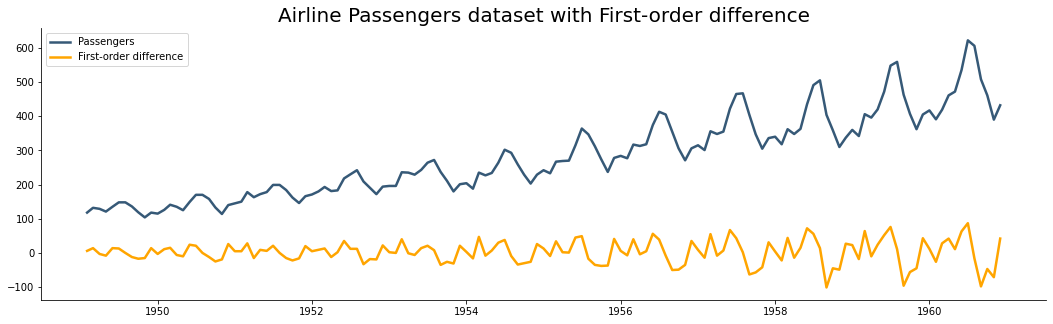

In [47]:
# First-order difference
df['Passengers_Diff'] = df['Passengers'].diff(periods=1)
df = df.dropna()

# Plot
plt.title('Airline Passengers dataset with First-order difference', size=20)
plt.plot(df['Passengers'], label='Passengers')
plt.plot(df['Passengers_Diff'], label='First-order difference', color='orange')
plt.legend();

The differenced series doesn’t look completely stationary but will suit for now.

You can now use the acf() function from statsmodels to calculate autocorrelation:

In [48]:
# Calculate autocorrelation
acf_values = acf(df['Passengers_Diff'])

/Users/rafaelbaetacarreira/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/rafaelbaetacarreira/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [49]:
np.round(acf_values,2)

array([ 1.  ,  0.3 , -0.1 , -0.24, -0.3 , -0.09, -0.08, -0.09, -0.29,
       -0.19, -0.1 ,  0.28,  0.83,  0.28, -0.11, -0.22, -0.23, -0.06,
       -0.07, -0.09, -0.3 , -0.16, -0.08,  0.26,  0.7 ,  0.26, -0.1 ,
       -0.2 , -0.17, -0.07, -0.04, -0.08, -0.25, -0.16, -0.05,  0.2 ,
        0.58,  0.23, -0.11, -0.13, -0.12])

The first value is 1, because a correlation between two identical series was calculated. But take a look at as 12th period — autocorrelation value is 0.83. This tells you a value 12 periods ago has a strong impact on the value today.

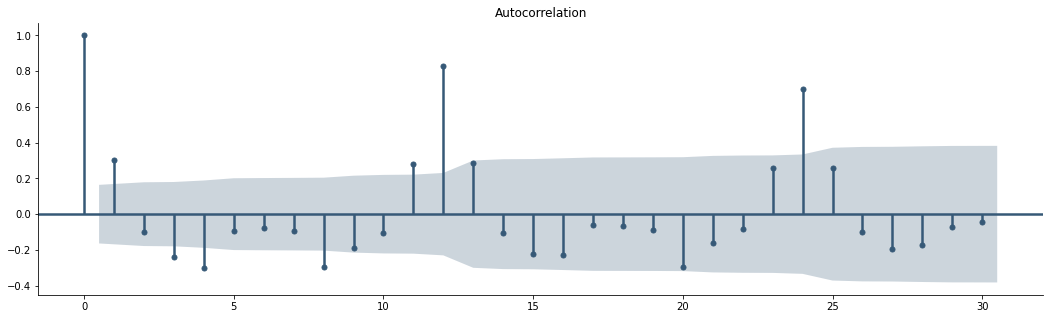

In [50]:
plot_acf(df['Passengers_Diff'], lags=30);

The plot confirms our assumption about the correlation on lag 12. The same is visible at lag 24, but the correlation declines over time. Value 12 periods ago has more impact on the value today than value 24 periods ago does.

Another thing to note is the shaded area. Anything inside it isn’t statistically significant.

### Partial autocorrelation — Theory and implementation

This one is a bit tougher to understand. It does the same as regular autocorrelation — shows the correlation of a sequence with itself lagged by some number of time units. But there’s a twist. Only the direct effect is shown, and all intermediary effects are removed.

#### For example, you want to know the direct relationship between the number of passengers today and 12 months ago. You don’t care about anything in between.

The number of passengers 12 months affects the number of passengers 11 months ago — and the whole chain repeats until the most recent period. These indirect effects are neglected in partial autocorrelation calculations.

You should also make the time series stationary before calculations.

You can use the pacf() function from statsmodels for the calculation:

In [51]:
pacf_values = pacf(df['Passengers_Diff'])

/Users/rafaelbaetacarreira/opt/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/Users/rafaelbaetacarreira/opt/miniconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [52]:
np.round(pacf_values,2)

array([ 1.  ,  0.3 , -0.22, -0.16, -0.23,  0.01, -0.2 , -0.16, -0.49,
       -0.28, -0.67, -0.42,  0.61, -0.05, -0.3 ,  0.02,  0.14,  0.09,
       -0.12,  0.01, -0.22, -0.12,  0.  , -0.07, -0.16, -0.17, -0.15,
       -0.02, -0.16, -0.48, -0.41, -0.29, -0.19, -1.14,  5.71,  0.83,
        0.56,  0.49, -0.06,  0.22,  0.24])

The correlation value at lag 12 has dropped to 0.61, indicating the direct relationship is a bit weaker. Let’s take a look at the results graphically to confirm these are still significant:

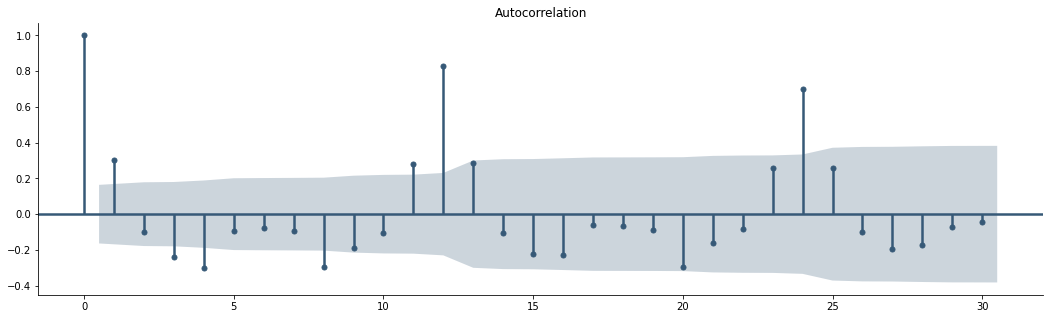

In [53]:
plot_acf(df['Passengers_Diff'], lags=30);

To conclude — the lag 12 is still significant, but the lag at 24 isn’t. A couple of lags before 12 are negatively correlated to the original time series. Take some time to think about why.

There’s still one important question remaining — how do you interpret ACF and PACF plots for forecasting? Let’s answer that next.

### How to interpret ACF and PACF plots

Time series models you’ll soon learn about, such as Auto Regression (AR), Moving Averages (MA), or their combinations (ARMA), require you to specify one or more parameters. These can be obtained by looking at ACF and PACF plots.

In a nutshell:

- If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.
- If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.
- If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).
- If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.

Still, reading ACF and PACF plots is challenging, and you’re far better of using grid search to find optimal parameter values. An optimal parameter combination has the lowest error (such as MAPE) or lowest general quality estimator (such as AIC).

In [54]:
#https://towardsdatascience.com/time-series-from-scratch-stationarity-tests-and-automation-14b02fa5ca4d

### Introduction to stationarity

A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time. (Source: Wikipedia)

The above definition tells you what weak-form stationarity is. That’s the only form you should care about in time series analysis.

The other form is strict stationarity. It implies that samples of identical size have identical distribution. It is very restrictive, so you won’t see it often in practice.

A time series has to satisfy the following conditions to be considered stationary:

- Constant mean — average value doesn’t change over time.
- Constant variance — variance doesn’t change over time.
- Constant covariance — covariance between periods of identical length doesn’t change over time.

You can test for stationarity with statistical tests, but sometimes plotting a time series can give you a rough estimate.

A stationary series is centered around some value, doesn’t have too many spikes and unexpected variations, and doesn’t show drastic behavior changes from one part to the other.

You should care about stationarity for two reasons:

- Stationary processes are easier to analyze.
- Most forecasting algorithms assume a series is stationary.

You now know the basic theory behind weak-form stationarity. Let’s cover the tests next.

### ADF test — How to test for stationarity

A while back, David Dickey and Wayne Fuller developed a test for stationarity — Dicky-Fuller test. It was improved later and renamed to Augmented Dicky-Fuller test, or ADF test for short.

It boils down to a simple hypothesis testing:

- Null hypothesis (H0) — Time series is not stationary.
- Alternative hypothesis (H1) — Time series is stationary.

In Python, the ADF test returns the following:

- Test statistic
- P-value
- Number of lags used
- 1%, 5%, and 10% critical values
- Estimation of the maximized information criteria (don’t worry about it)

If the returned P-value is higher than 0.05, the time series isn’t stationary. 0.05 is the standard threshold, but you’re free to change it.

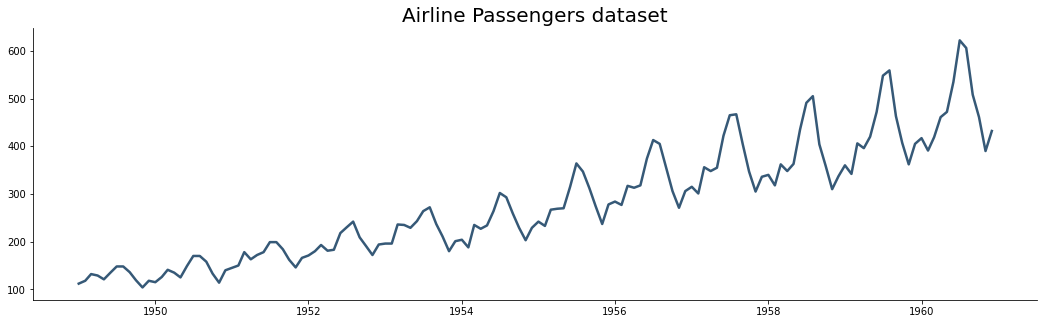

In [56]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('data/airline-passengers.csv', index_col='Month', parse_dates=True)

# Visualize
plt.title('Airline Passengers dataset', size=20)
plt.plot(df);

#### It doesn’t look stationary at all, but let’s verify that with a test:

In [57]:
# ADF stationarity test
# Returns: {Test statistic, P-value, Num lags used, {Critical values}, Estmation of maximized information criteria}
adfuller(df['Passengers'])

(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

The P-value is just over 0.99, providing strong evidence that the dataset isn’t stationary. You’ve learned the concept of differencing in the previous articles. Now you’ll use it to calculate the N-th order difference. Here’s how the procedure looks for the first and second order:

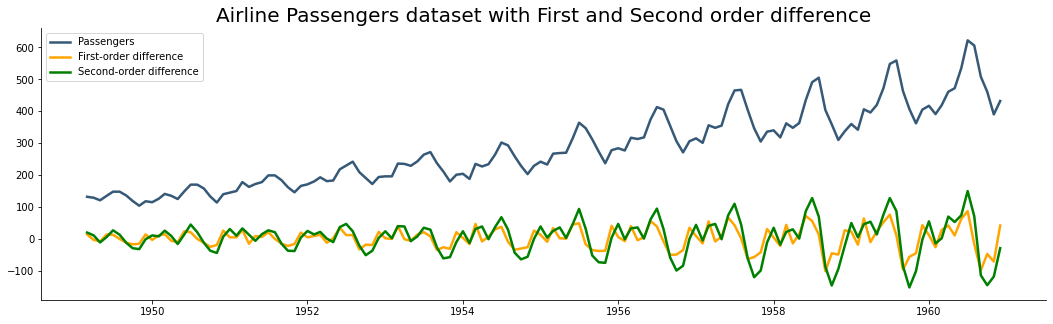

In [58]:
# First and second order difference
df['Passengers_Diff1'] = df['Passengers'].diff()
df['Passengers_Diff2'] = df['Passengers'].diff(2)

# Don't forget to drop missing values
df = df.dropna()

# Plot
plt.title('Airline Passengers dataset with First and Second order difference', size=20)
plt.plot(df['Passengers'], label='Passengers')
plt.plot(df['Passengers_Diff1'], label='First-order difference', color='orange')
plt.plot(df['Passengers_Diff2'], label='Second-order difference', color='green')
plt.legend();

The differenced series looks more promising than the original data, but let’s use the ADF test to verify that claim:

In [59]:
# Perform ADF test
adf_diff_1 = adfuller(df['Passengers_Diff1'])
adf_diff_2 = adfuller(df['Passengers_Diff2'])

# Extract P-values
p_1 = adf_diff_1[1]
p_2 = adf_diff_2[1]

# Print
print(f'P-value for 1st order difference: {np.round(p_1, 5)}')
print(f'P-value for 2nd order difference: {np.round(p_2, 5)}')

P-value for 1st order difference: 0.05366
P-value for 2nd order difference: 0.03863


The first-order difference didn’t make the time series stationary, at least not at the usual significance level. Second-order differencing did the trick.

You can see how manual testing of different differencing orders can be tedious. That’s why you’ll write an automation function next.

### Automating stationarity tests

The automation function will accept the following parameters:

- data: pd.Series — time series values, without the datetime information
- alpha: float = 0.05 — significance level, set to 0.05 by default
- max_diff_order: int = 10 — the maximum time allowed to difference the time series

Python dictionary is returned, containing differencing_order and time_series keys. The first one is self-explanatory, and the second one contains the differenced time series.

The function will first check if the series is already stationary. If that’s the case, it’s returned as-is. If not, the ADF test is performed for every differencing order up to max_diff_order. The function keeps track of P-values and returns the one with the lowest differencing order that’s below the significance level alpha.

In [60]:
def make_stationary(data: pd.Series, alpha: float = 0.05, max_diff_order: int = 10) -> dict:
    # Test to see if the time series is already stationary
    if adfuller(data)[1] < alpha:
        return {
            'differencing_order': 0,
            'time_series': np.array(data)
        }
    
    # A list to store P-Values
    p_values = []
    
    # Test for differencing orders from 1 to max_diff_order (included)
    for i in range(1, max_diff_order + 1):
        # Perform ADF test
        result = adfuller(data.diff(i).dropna())
        # Append P-value
        p_values.append((i, result[1]))
        
    # Keep only those where P-value is lower than significance level
    significant = [p for p in p_values if p[1] < alpha]
    # Sort by the differencing order
    significant = sorted(significant, key=lambda x: x[0])
    
    # Get the differencing order
    diff_order = significant[0][0]
    
    # Make the time series stationary
    stationary_series = data.diff(diff_order).dropna()
    
    return {
        'differencing_order': diff_order,
        'time_series': np.array(stationary_series)
    }

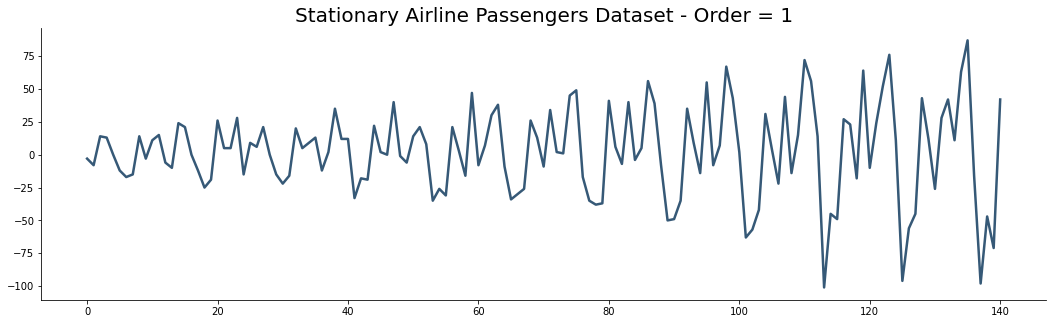

In [61]:
ap_stationary = make_stationary(
    data=df['Passengers']
)

plt.title(f"Stationary Airline Passengers Dataset - Order = {ap_stationary['differencing_order']}", size=20)
plt.plot(ap_stationary['time_series']);

Just like before, second-order differencing is required to make the dataset stationary. But what if you decide for a different significance level? Well, take a look for yourself:

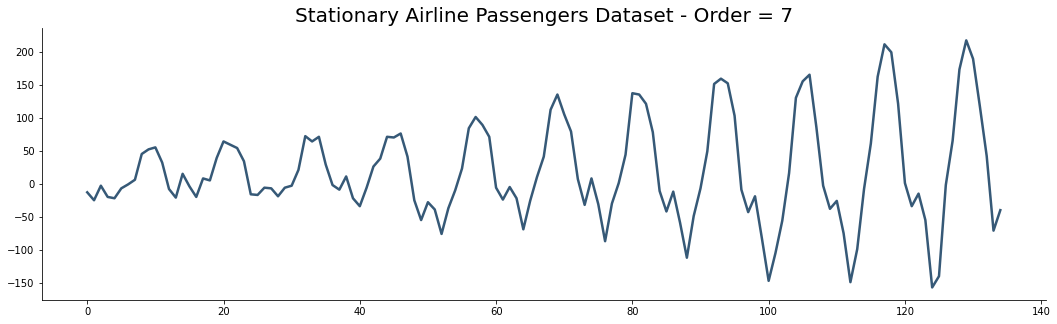

In [62]:
ap_stationary = make_stationary(
    data=df['Passengers'],
    alpha=0.01
)

plt.title(f"Stationary Airline Passengers Dataset - Order = {ap_stationary['differencing_order']}", size=20)
plt.plot(ap_stationary['time_series']);

You’ll have to difference the dataset eight times for the significance level of 0.01. It would be a nightmare to revert, so you should probably stick with a higher significance level.

And there you have it — everything you should know about stationarity. The whole concept will get clearer in a couple of articles when you start with modeling and forecasting. For now, remember that a stationary process is easier to analyze and is required by most forecasting models.

There’s still a couple of things left to cover before forecasting. These include train/test splits, metrics, and evaluations. 